# Hw9

### 1, ISLP chapter 12 exercise #2

#### (a)

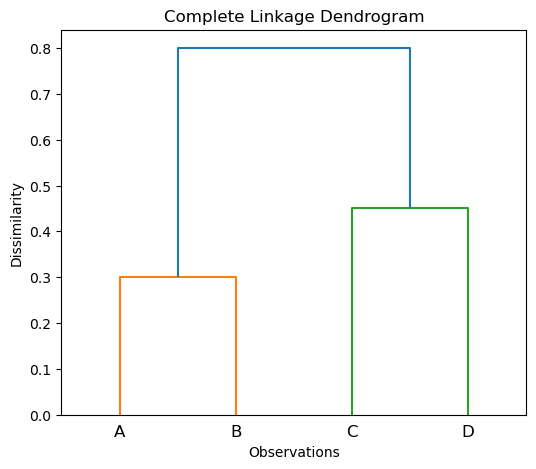

In [15]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dissimilarity_matrix = np.array([
    [0.0, 0.3, 0.4, 0.7],
    [0.3, 0.0, 0.5, 0.8],
    [0.4, 0.5, 0.0, 0.45],
    [0.7, 0.8, 0.45, 0.0]
])
condensed_matrix = sch.distance.squareform(dissimilarity_matrix)
complete_linkage = sch.linkage(condensed_matrix, method='complete')
plt.figure(figsize=(6, 5))
sch.dendrogram(complete_linkage, labels=['A', 'B', 'C', 'D'], color_threshold=0.5)
plt.title("Complete Linkage Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.show()

#### (b)

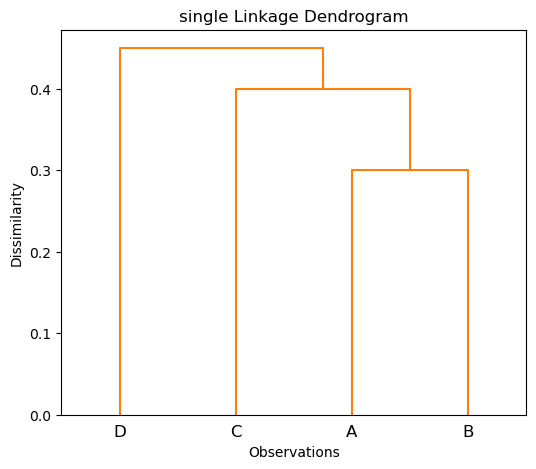

In [17]:
single_linkage = sch.linkage(condensed_matrix, method='single')
plt.figure(figsize=(6, 5))
sch.dendrogram(single_linkage, labels=['A', 'B', 'C', 'D'], color_threshold=0.5)
plt.title("single Linkage Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.show()

#### (c)

in that case, A,B are in the same dendrogram while C,D are in the other one

#### (d)

in that case, D is in one dendrogram while C,A,B are in the other one.

#### (e)

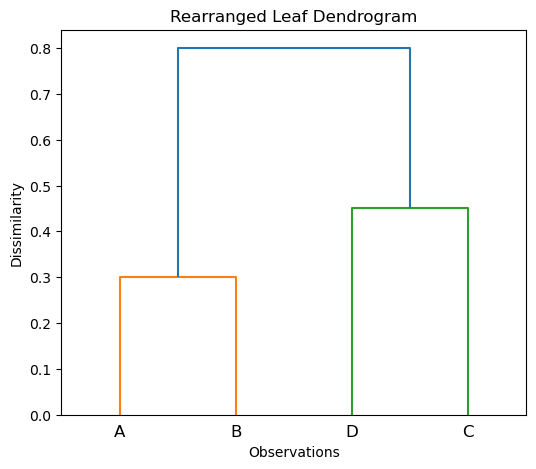

In [24]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dissimilarity_matrix = np.array([    
    [0.0, 0.3, 0.4, 0.7],    
    [0.3, 0.0, 0.5, 0.8],    
    [0.4, 0.5, 0.0, 0.45],    
    [0.7, 0.8, 0.45, 0.0]
])
condensed_matrix = sch.distance.squareform(dissimilarity_matrix)
complete_linkage = sch.linkage(condensed_matrix, method='complete')
plt.figure(figsize=(6, 5))
sch.dendrogram(complete_linkage, labels=['A', 'B', 'D', 'C'], color_threshold=0.5)
plt.title("Rearranged Leaf Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Dissimilarity")
plt.show()

### 2

#### (a)

$\lambda_1 u_1 u_2=4*\begin{vmatrix}0.6\\0.8\end{vmatrix}*\begin{vmatrix}0.6&0.8\end{vmatrix}=\begin{vmatrix}1.44&1.92\\1.92&2.56\end{vmatrix}$

$\lambda_2 u_1 u_2=1*\begin{vmatrix}-0.8\\0.6\end{vmatrix}*\begin{vmatrix}-0.8&0.6\end{vmatrix}=\begin{vmatrix}0.64&-0.48\\-0.48&0.36\end{vmatrix}$

T=$\begin{vmatrix}1.44&1.92\\1.92&2.56\end{vmatrix}+\begin{vmatrix}0.64&-0.48\\-0.48&0.36\end{vmatrix}=\begin{vmatrix}2.08&1.44\\1.44&2.92\end{vmatrix}$

#### (b)

$\frac{4}{4+1}=0.8$

80% of variance is explained.

#### (c)

$X*u_1=\begin{vmatrix}1&2\end{vmatrix}*\begin{vmatrix}0.6\\0.8\end{vmatrix}=2.2$

$X*u_2=\begin{vmatrix}1&2\end{vmatrix}*\begin{vmatrix}-0.8\\0.6\end{vmatrix}=0.4$

score for first PC:2.2

score for second PC: 0.4

### 3

#### (a)

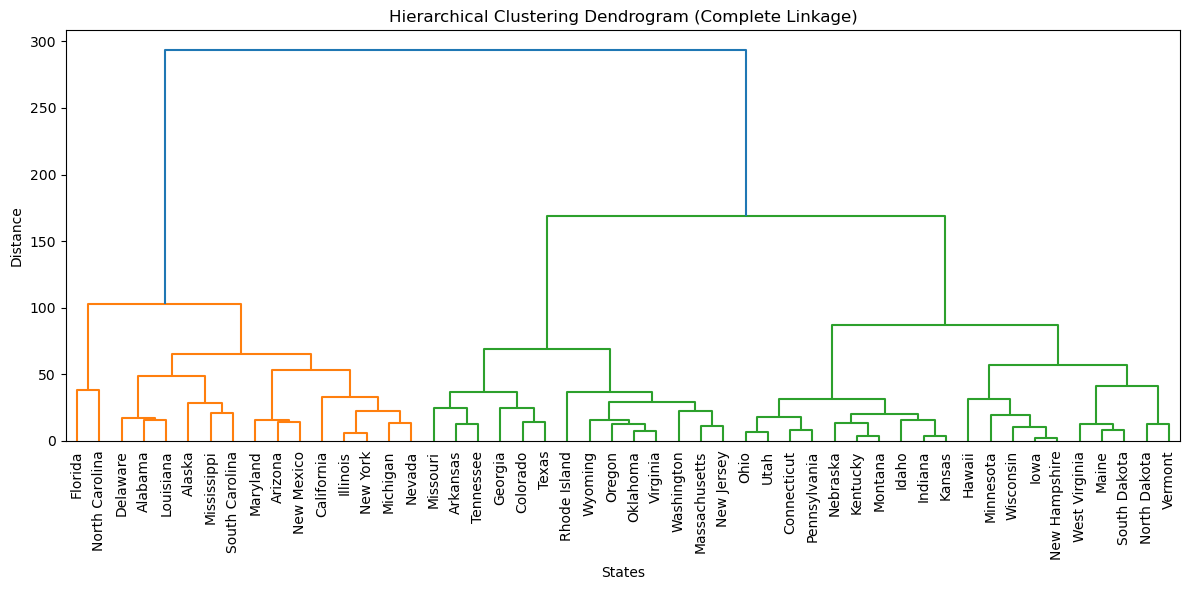

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
arrest=pd.read_csv("C:\\Users\\DELL\\Downloads\\arrests.csv")
y= arrest.iloc[:, 0] 
X= arrest.iloc[:, 1:]  
linkage_matrix = linkage(X, method='complete', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=y.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("States")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#### (b)

States in Each Cluster:

Cluster 1 (2 states):
Florida, North Carolina 

Cluster 2 (14 states):
Alabama, Alaska, Arizona, California, Delaware, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, South Carolina 

Cluster 3 (14 states):
Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming 

Cluster 4 (10 states):
Connecticut, Idaho, Indiana, Kansas, Kentucky, Montana, Nebraska, Ohio, Pennsylvania, Utah 

Cluster 5 (10 states):
Hawaii, Iowa, Maine, Minnesota, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin 



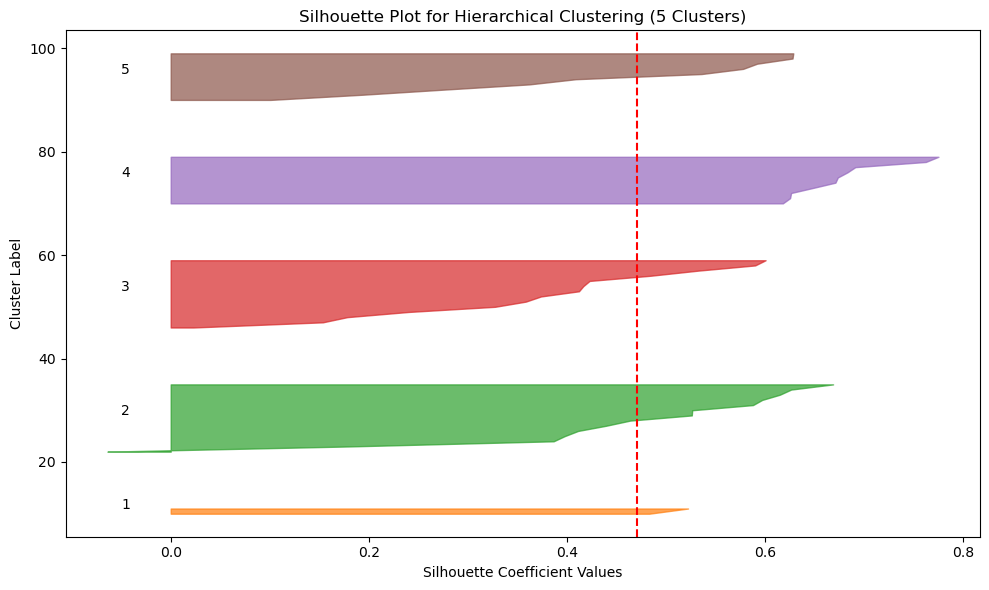

In [46]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import numpy as np
cluster_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
cluster_df = pd.DataFrame({'State': y, 'Cluster': cluster_labels})
print("States in Each Cluster:\n")
for i in range(1, 6):
    states_in_cluster = cluster_df[cluster_df['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(states_in_cluster)} states):")
    print(", ".join(states_in_cluster), "\n")
silhouette_vals = silhouette_samples(X, cluster_labels)
avg_score = silhouette_score(X, cluster_labels)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(1, 6):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = sns.color_palette("tab10")[i % 10]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(avg_score, color="red", linestyle="--")
plt.title("Silhouette Plot for Hierarchical Clustering (5 Clusters)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.tight_layout()
plt.show()

#### (c)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Clusters (K=5):

Cluster 1 (10 states):
Hawaii, Iowa, Maine, Minnesota, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin 

Cluster 2 (10 states):
Alabama, Alaska, California, Delaware, Illinois, Louisiana, Michigan, Mississippi, Nevada, New York 

Cluster 3 (14 states):
Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming 

Cluster 4 (10 states):
Connecticut, Idaho, Indiana, Kansas, Kentucky, Montana, Nebraska, Ohio, Pennsylvania, Utah 

Cluster 5 (6 states):
Arizona, Florida, Maryland, New Mexico, North Carolina, South Carolina 



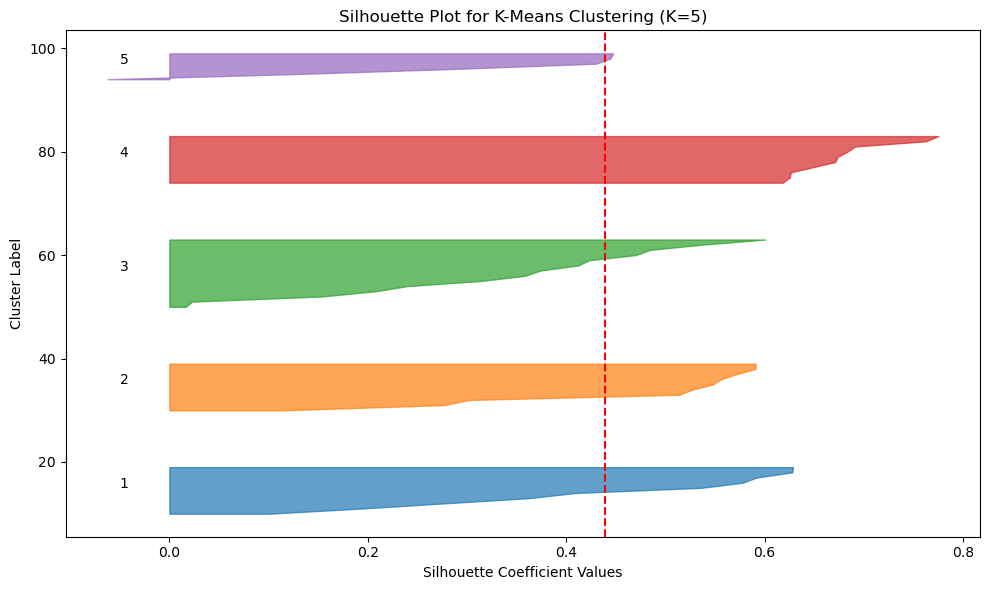

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)
cluster_df = pd.DataFrame({'State': y, 'Cluster': cluster_labels + 1}) 
print("K-Means Clusters (K=5):\n")
for i in range(1, 6):
    states = cluster_df[cluster_df['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(states)} states):")
    print(", ".join(states), "\n")
silhouette_vals = silhouette_samples(X, cluster_labels)
avg_score = silhouette_score(X, cluster_labels)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = sns.color_palette("tab10")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
    y_lower = y_upper + 10
plt.axvline(avg_score, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering (K=5)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.tight_layout()
plt.show()

#### (d)

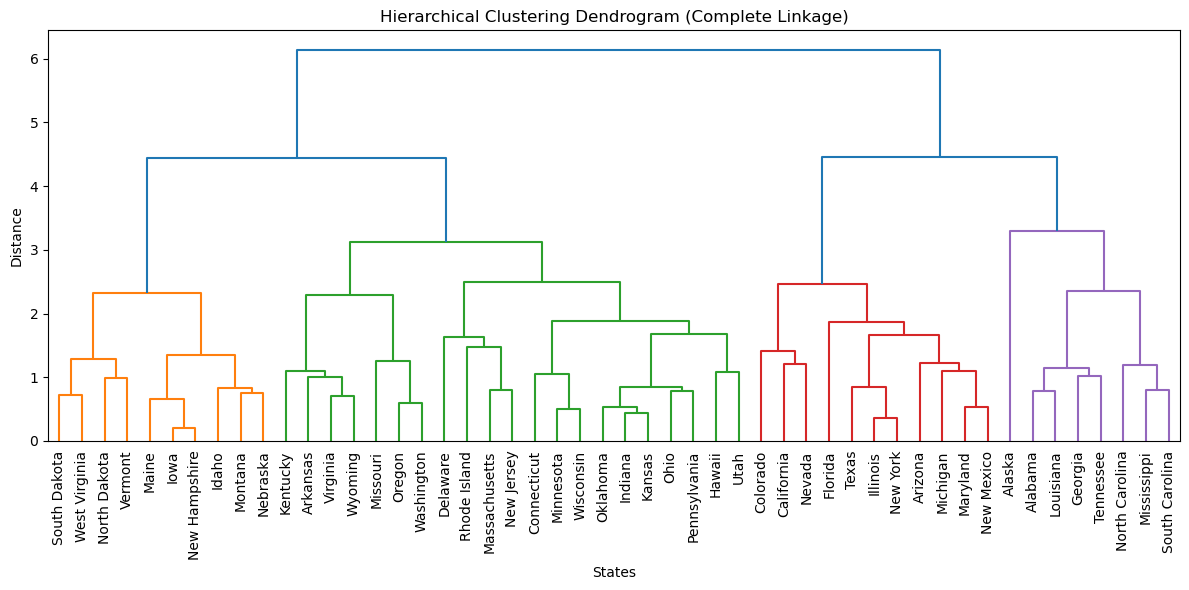

States in Each Cluster:

Cluster 1 (10 states):
Idaho, Iowa, Maine, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia 

Cluster 2 (21 states):
Arkansas, Connecticut, Delaware, Hawaii, Indiana, Kansas, Kentucky, Massachusetts, Minnesota, Missouri, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wisconsin, Wyoming 

Cluster 3 (11 states):
Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas 

Cluster 4 (7 states):
Alabama, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee 

Cluster 5 (1 states):
Alaska 



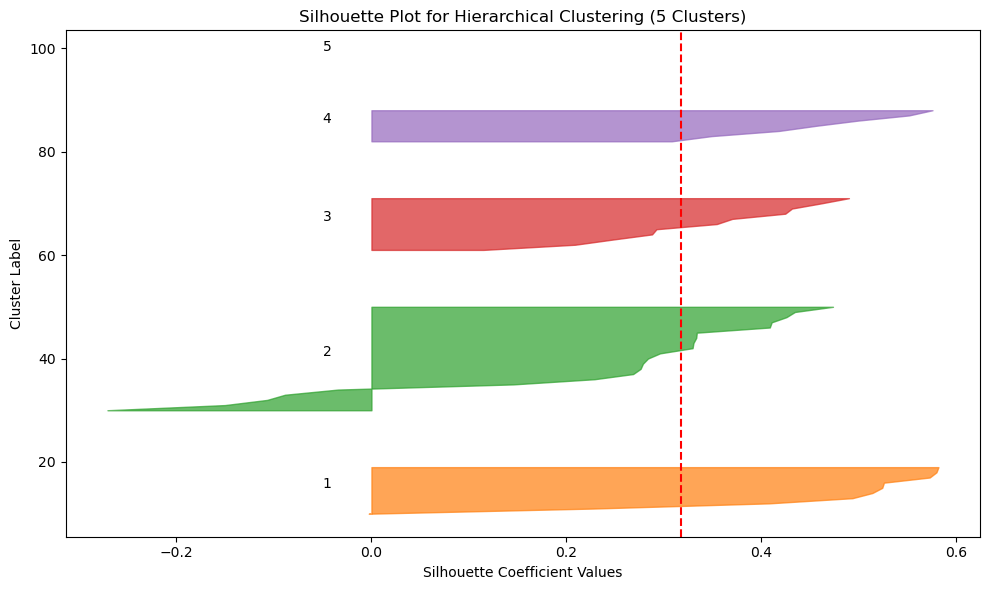

K-Means Clusters (K=5):

Cluster 1 (9 states):
Connecticut, Hawaii, Massachusetts, New Jersey, Ohio, Pennsylvania, Rhode Island, Utah, Washington 

Cluster 2 (10 states):
Idaho, Iowa, Maine, Minnesota, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin 

Cluster 3 (13 states):
Alaska, Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Missouri, Nevada, New Mexico, New York, Texas 

Cluster 4 (7 states):
Alabama, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee 

Cluster 5 (11 states):
Arkansas, Delaware, Indiana, Kansas, Kentucky, Montana, Nebraska, Oklahoma, Oregon, Virginia, Wyoming 



D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


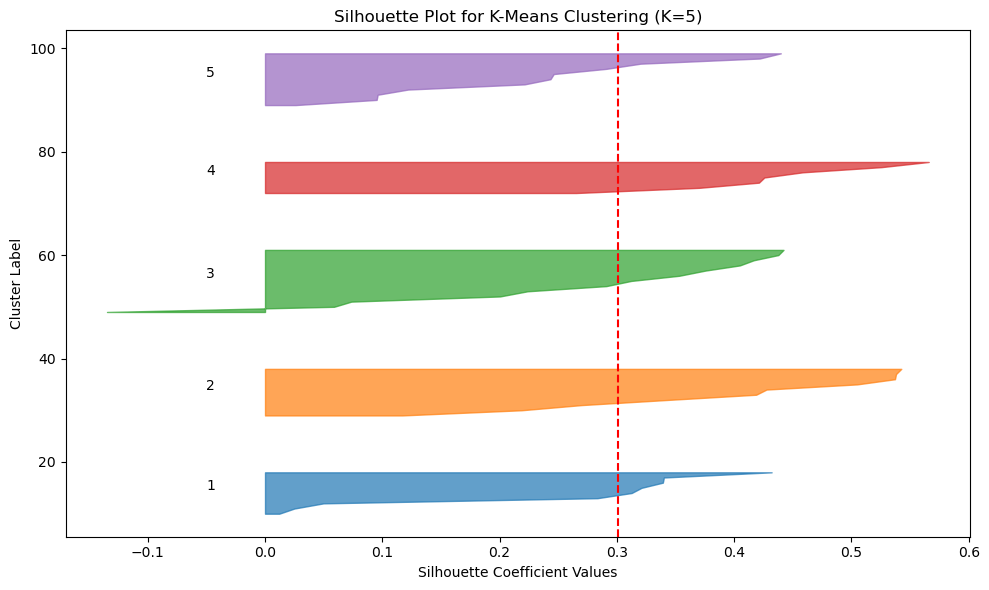

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
linkage_matrix = linkage(scaled_data, method='complete', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=y.values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("States")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()
cluster_labels = fcluster(linkage_matrix, t=5, criterion='maxclust')
cluster_df = pd.DataFrame({'State': y, 'Cluster': cluster_labels})
print("States in Each Cluster:\n")
for i in range(1, 6):
    states_in_cluster = cluster_df[cluster_df['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(states_in_cluster)} states):")
    print(", ".join(states_in_cluster), "\n")
silhouette_vals = silhouette_samples(scaled_data, cluster_labels)
avg_score = silhouette_score(scaled_data, cluster_labels)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(1, 6):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = sns.color_palette("tab10")[i % 10]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(avg_score, color="red", linestyle="--")
plt.title("Silhouette Plot for Hierarchical Clustering (5 Clusters)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.tight_layout()
plt.show()
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)
cluster_df = pd.DataFrame({'State': y, 'Cluster': cluster_labels + 1}) 
print("K-Means Clusters (K=5):\n")
for i in range(1, 6):
    states = cluster_df[cluster_df['Cluster'] == i]['State'].tolist()
    print(f"Cluster {i} ({len(states)} states):")
    print(", ".join(states), "\n")
silhouette_vals = silhouette_samples(scaled_data, cluster_labels)
avg_score = silhouette_score(scaled_data, cluster_labels)
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(5):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    color = sns.color_palette("tab10")[i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
    y_lower = y_upper + 10
plt.axvline(avg_score, color="red", linestyle="--")
plt.title("Silhouette Plot for K-Means Clustering (K=5)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.tight_layout()
plt.show()

#### (e)

In [53]:
from sklearn.decomposition import PCA
for n in [1, 2, 3]:
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    explained = pca.explained_variance_ratio_
    cumulative = explained.cumsum()
    print(f"\n🔹 PCA with {n} component(s):")
    for i, var in enumerate(explained):
        print(f"  - PC{i+1} explains {var:.4f} ({var*100:.2f}%) of variance")
    print(f"Cumulative Variance Explained: {cumulative[-1]:.4f} ({cumulative[-1]*100:.2f}%)")


🔹 PCA with 1 component(s):
  - PC1 explains 0.6201 (62.01%) of variance
Cumulative Variance Explained: 0.6201 (62.01%)

🔹 PCA with 2 component(s):
  - PC1 explains 0.6201 (62.01%) of variance
  - PC2 explains 0.2474 (24.74%) of variance
Cumulative Variance Explained: 0.8675 (86.75%)

🔹 PCA with 3 component(s):
  - PC1 explains 0.6201 (62.01%) of variance
  - PC2 explains 0.2474 (24.74%) of variance
  - PC3 explains 0.0891 (8.91%) of variance
Cumulative Variance Explained: 0.9566 (95.66%)


In [1]:
!jupyter nbconvert --to html stats_503_hw9.ipynb

[NbConvertApp] Converting notebook stats_503_hw9.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 791759 bytes to stats_503_hw9.html
